# Computations for solving micro-wire permittivity

## 1. Theory

This notebook will explain the process to obtain the dielectric permittivity of a single wire. We consider the system of long continuous wires and will demonstrate that its effective permittivity depends on the wire surface impedance. Previously was have demonstrated that the response of such an array is similar to that of a low-density
plasma of very heavy charged particles, which is a consequence of confining the electrons within thin wires. As a result, the effective permittivity for waves with the electric field polarization along the wires has a characteristic plasma dispersion behavior $\epsilon_{eff} = \epsilon − (\omega_p/\omega)^2$ but with strongly reduced plasma frequency $\omega_p$,

$$\omega_p=\frac{2\pi c^2}{L^2ln(L/a)},$$

where L is the cell parameter (the average distance between the wires). The value of the plasma frequency would be in the GHz range for the radius a of few microns and the cell parameter L of few millimeters.

Within this approach, the plasma frequency and the effective permittivity of continuous wire arrays are independent of the internal conductive and magnetic properties of the wires. $\epsilon_{eff}$ of such composites with nonmagnetic wires was deduced by solving the Maxwell equations within and outside the wires and employing a homogenization procedure,

$$\epsilon_{eff}=\epsilon - p\frac{2\epsilon_c F_1(k_ca)}{(ak_c)^2F_1(k_ca)ln(L/a)-1}$$

$$F_1=J_1(x)/xJ_0(x),$$

where $p = \pi a^2/L^2$ is the wire volume concentration, $\epsilon_c
= 4\pi i \sigma/\omega$ is the dielectric permittivity of the conductor, $\sigma$ is
the wire conductivity (~$10^{16} [s^{-1}]$), $k_c^2 = 4\pi i \omega\sigma / c^2$ is the wave number in
the wire, and $J_{0,1}$ are the Bessel functions.

Reference:

**Experimental demonstration of tunable scattering spectra at microwave frequencies in composite
media containing CoFeCrSiB glass-coated amorphous ferromagnetic wires and comparison
with theory**
*(D. P. Makhnovskiy, L. V. Panina, C. Garcia, A. P. Zhukov, and J. Gonzalez)*

DOI: 10.1103/PhysRevB.74.064205


## 2. Solving the equation

The input data have the following like form:

<img src="efectivo.png",width=500,height=500>

with that we are able to compute the wire (conductor) permittivity,

In [1]:
######################### IMPORTING LIBRARIES ########################
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpmath import *
from sympy import *
from scipy import special as sp
from numba import vectorize
from matplotlib import pyplot
%matplotlib inline

######################### DEFINING VALUES #############################
eff = np.array([95.-6.j, 115.-30.j, 90.-110.j, -15.-120.j, -30.-50.j, -15.-25.j, -5.-18.j, -12.j, 5.-10.j, 10.-10.j, 8.-8.j, 8.-5.j, 8.-2.j, 8.-2.j],
               dtype=complex)              #effective permittivity
print len(eff)
eff_r = 0.984*np.real(eff)
eff_i = 2.1667*np.imag(eff)  

e = 16                    #matrix permittivity
f = np.linspace(1e9, 14e9, len(eff))
w = f*2.*np.pi             #angular frequency
a = 5e-6                  #wire radius
c = 3e8                     #light speed
p = 0.01/100.             #wire volume concentration
L = np.sqrt(np.pi*a**2/p)   #mid distance between wires
lc= 0.01                    #wire lenght
largo=0.38                  #composite lenght
ancho=0.34                  #composite width
prof=0.3/1000.               #composite depth
volm=largo*ancho*prof       #composite volume
volc=np.pi*a**2*lc          #wire volume
volct=volm*p                #all wires volume
n=volct/volc                #number of wires
nh=n*1e-4/(largo*ancho)     #number of wires/composite superficial area

print "Mid distance between wires =",L, '[m2]'
print "Wire volume =", volc, '[m3]'
print "All wires sum volume =", volct, '[m3]'
print "Composite volume =", volm, '[m3]'
print "Number of wires =", n, '[-]'
print "Number of wires in 1[cm2] of composite =", nh

######################### SOLVER ######################################
x = symbols('x')
ec = np.ones(len(eff_r), dtype=complex)


for i in range(len(eff_r)):
    err_r=10.
    err_i=10.
    cont=0
    while True:
        if err_r>1e-3 or err_i>1e-3:
            ecp = ec[i]
            J1 = sp.jv(1,(complex(ec[i])**0.5)*w[i]*a/c)
            J0 = sp.jv(0,(complex(ec[i])**0.5)*w[i]*a/c)
            F1 = J1/((complex(ec[i])**0.5)*w[i]*a*J0/c)
            sol = solve(e - (np.pi*a**2/L**2)*(2*x*F1)/((((x**0.5)*w[i]*a/c)**2*F1*np.log(L/a))-1)
                        - complex(eff_r[i], eff_i[i]) , x)
            ec[i] = 0.5*sol[0]+0.5*ecp
            err_r = abs(np.real(ecp)-np.real(ec[i]))
            err_i = abs(np.imag(ecp)-np.imag(ec[i]))
            cont+=1
        if cont%100==0:
            print 'lleva', cont, 'iteraciones'
#            print 'y un valor de permitividad:', ec[i]
        elif err_r<1e-3 and err_i<1e-3:
#            print 'Number of iterations=', cont
#            print sol
            break
    ec[i] = complex(sol[0])

14
Mid distance between wires = 0.000886226925453 [m2]
Wire volume = 7.85398163397e-13 [m3]
All wires sum volume = 3.876e-09 [m3]
Composite volume = 3.876e-05 [m3]
Number of wires = 4935.07647539 [-]
Number of wires in 1[cm2] of composite = 3.81971863421


### Plotting the permittivities:

[  757806.85229033 -124206.10507707j   906921.34375698 -519713.40924057j
  1302360.60471906-1299354.44417665j  1307905.55060929-1149128.37472852j
   526912.18802116 -996706.99447059j   137656.73023911 -689143.30360541j
    94868.97051321 -483803.1433158j     24060.59615122 -356960.17140736j
    39490.92915110 -267584.88080546j    82629.26766469 -200138.22110356j
    57031.70780409 -194836.01685011j    -4180.96289009 -169276.28507118j
   -97289.97309467 -109113.32947863j   -93467.07535289 -127248.77814093j]


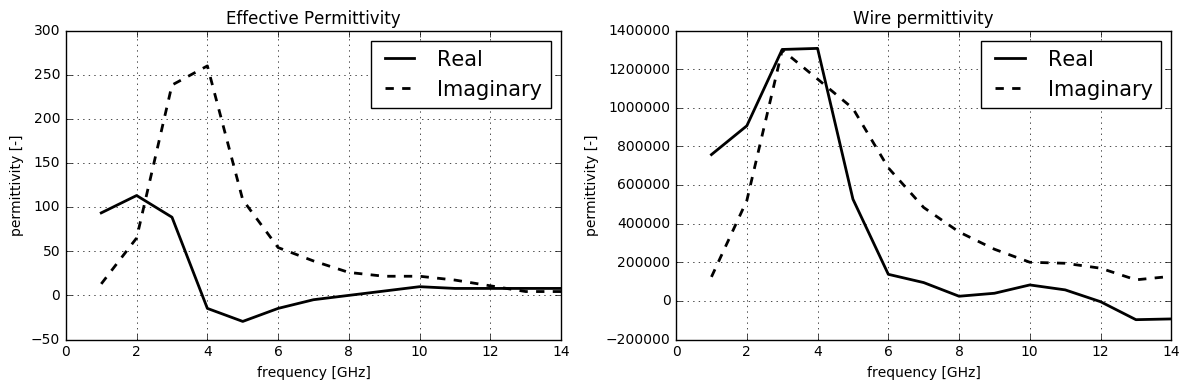

In [5]:
pyplot.figure(figsize=(12,4))  
pyplot.subplot(121)

pyplot.title('Effective Permittivity')
pyplot.plot(f/1e9,eff_r, 'k-', linewidth=2,
            label='Real');
pyplot.plot(f/1e9,-eff_i,'k--', linewidth=2,
            label='Imaginary');
pyplot.xlabel('frequency [GHz]')
pyplot.ylabel('permittivity [-]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid()

pyplot.subplot(122)
len(np.imag(ec))
pyplot.title('Wire permittivity')
pyplot.plot(f/1e9,np.real(ec), 'k-', linewidth=2,
            label='Real');
pyplot.plot(f/1e9,-np.imag(ec),'k--', linewidth=2,
            label='Imaginary');
pyplot.xlabel('frequency [GHz]')
pyplot.ylabel('permittivity [-]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid()

plt.tight_layout()

print ec

[  95.  -6.j  115. -30.j   90.-110.j  -15.-120.j  -30. -50.j  -15. -25.j
   -5. -18.j    0. -12.j    5. -10.j   10. -10.j    8.  -8.j    8.  -5.j
    8.  -2.j    8.  -2.j]


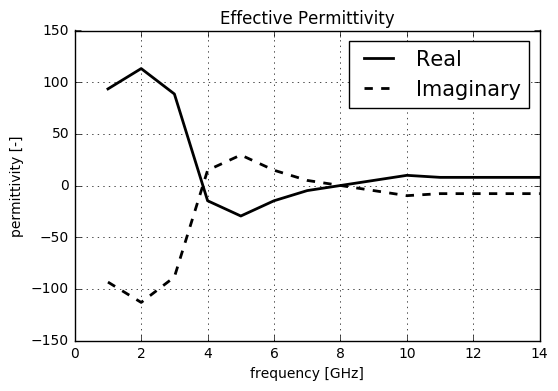

In [3]:
### PRUEBA DE QUE EL VALOR ESTÉ CORRECTO ####
eff_p = np.zeros(len(eff))
J1 = sp.jv(1,(ec**0.5)*w*a/c)
J0 = sp.jv(0,(ec**0.5)*w*a/c)
F1 = J1/(((ec**0.5)*w*a/c)*J0)
eff_p = e - (np.pi*a**2/L**2)*(2*ec*F1)/((((ec**0.5)*w*a/c)**2*F1*np.log(L/a))-1)

#J1 = sp.jv(1,(complex(ec)**0.5)*w*a/c)
#J0 = sp.jv(0,(complex(ec)**0.5)*w*a/c)
#F1 = J1/((complex(ec)**0.5)*w*a/c*J0)
#eff = e - (np.pi*a**2/L**2)*(2*complex(ec)*F1)/((((complex(ec)**0.5)*w*a/c)**2*F1*np.log(L/a))-1)
print eff

pyplot.title('Effective Permittivity')
pyplot.plot(f/1e9,np.real(eff_p), 'k-', linewidth=2,
            label='Real');
pyplot.plot(f/1e9,-np.real(eff_p),'k--', linewidth=2,
            label='Imaginary');
pyplot.xlabel('frequency [GHz]')
pyplot.ylabel('permittivity [-]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid()



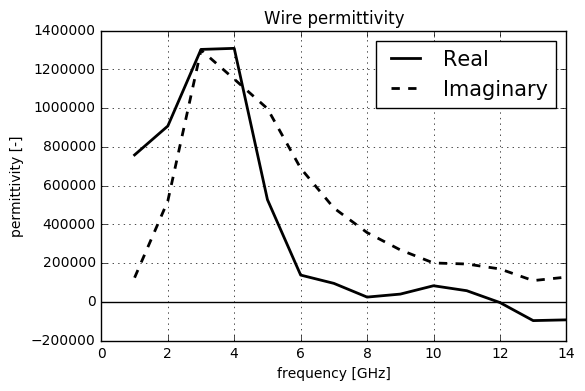

In [6]:
pyplot.title('Wire permittivity')
pyplot.plot(f/1e9,np.real(ec), 'k-', linewidth=2,
            label='Real');
pyplot.plot(f/1e9,-np.imag(ec),'k--', linewidth=2,
            label='Imaginary');
pyplot.xlabel('frequency [GHz]')
pyplot.ylabel('permittivity [-]')
pyplot.axhline(0, color='black')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid()